## Introduction

In this code, I sample a small sample from the India data obtained from the 2020 HDX Kontur historical data: https://data.humdata.org/dataset/india-historical-population-density-for-1975-2020-for-400m-h3-hexagons

In [1]:
import geopandas as gpd
import os

Not the most elegant way to code as I prefer Pathlib and keep it more OS agnostic:

In [2]:
dir = 'C:\\Ellen\\personal\\projects\\geospatial\\map_challenge_30_days\\day_8'

In [3]:
file_name = 'kontur_historical_population_density_for_2020_IN_20230621.gpkg'

In [4]:
file_path = os.path.join(dir,file_name)

In [5]:
%time 
map_2020 = gpd.read_file(file_path, engine="pyogrio") #pyogrio to speed things up

CPU times: total: 0 ns
Wall time: 0 ns


In [6]:
map_2020.head()

,h3,population,geometry
0,8864e6ceddfffff,189,"POLYGON ((93.04213 13.23463, 93.04248 13.23986..."
1,8864e6ced9fffff,50,"POLYGON ((93.03695 13.22707, 93.03730 13.23230..."
2,8864e6ced1fffff,4,"POLYGON ((93.03283 13.23520, 93.03318 13.24042..."
3,8864e6cecbfffff,666,"POLYGON ((93.05143 13.23406, 93.05179 13.23929..."
4,8864e6cec3fffff,133,"POLYGON ((93.04731 13.24219, 93.04766 13.24742..."


In [7]:
map_2020.shape

(2821561, 3)

Now, we need to read in the shape file for the different states in India. The source is: https://github.com/datameet/maps/tree/master/Survey-of-India-Index-Maps/StateBoundary 

In [8]:
state_dir = os.path.join(dir, 'StateBoundary.shp')

In [9]:
state = gpd.read_file(state_dir)

In [10]:
state.head()

,state,geometry
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,CHANDIGARH,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,DADAR & NAGAR HAVELI,"MULTIPOLYGON (((8137193.486 2315664.964, 81373..."
3,DAMAN & DIU,"MULTIPOLYGON (((8111624.471 2328002.898, 81117..."
4,DELHI,"POLYGON ((8583390.570 3359116.190, 8583476.212..."


In [11]:
state.shape

(37, 2)

<Axes: >

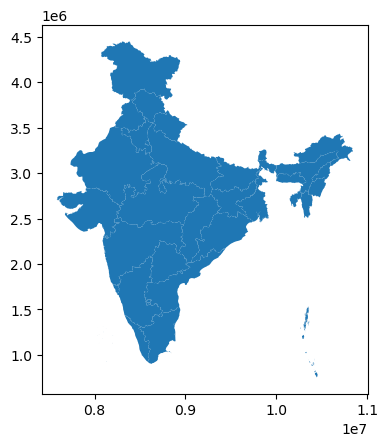

In [12]:
state.plot()

In [13]:
karnataka = state[state['state']=='KARNATAKA']

<Axes: >

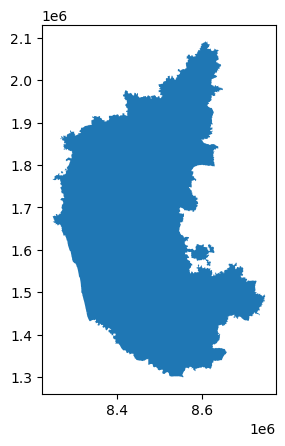

In [14]:
karnataka.plot()

In [15]:
karnataka.to_file('karnataka.shp') # To save for later

In [16]:
karnataka.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
map_2020.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
# Reproject Karnataka
karnataka_reproj = karnataka.to_crs('4326')

The following cell does take a lot of time to execute 

In [ ]:
map_2020_clipped_karnataka = map_2020.clip(karnataka_reproj)

In [ ]:
map_2020_clipped_karnataka.shape

In [ ]:
This cell below takes really a lot of time to do so please be patient.

In [ ]:
map_2020_clipped_karnataka.to_file('karnataka_population.shp') # In case you want to shave the file